<a href="https://colab.research.google.com/github/anajikadam17/MachineCodeBasics/blob/main/Basics/GroupBy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this tutorial we are going to look at weather data from various cities and see how group by can be used to run some analytics

In [28]:
import pandas as pd
# https://raw.githubusercontent.com/codebasics/py/master/pandas/7_group_by/weather_by_cities.csv
path = "https://raw.github.com/codebasics/py/master/pandas/7_group_by/"
df = pd.read_csv(path+"weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


For this dataset, get following answers,
1. What was the maximum temperature in each of these 3 cities?
2. What was the average windspeed in each of these 3 cities?


In [3]:
g = df.groupby("city")
g

In [6]:
for city, data in g:
    print("city:",city)
    print("="*100)
    print("data:",data)

city: mumbai
data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city: new york
data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris
data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [7]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [8]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [9]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [10]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [11]:
g.describe()

temperature                         ... windspeed                   
               count   mean       std   min  ...       25%   50%    75%   max
city                                         ...                             
mumbai           4.0  88.50  3.109126  85.0  ...      5.00   8.5  12.75  15.0
new york         4.0  32.25  3.304038  28.0  ...      6.75   7.0   8.25  12.0
paris            4.0  47.75  5.315073  42.0  ...      9.50  11.5  14.75  20.0

[3 rows x 16 columns]

In [12]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [13]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

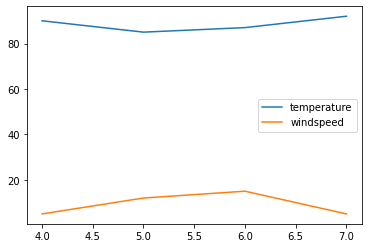

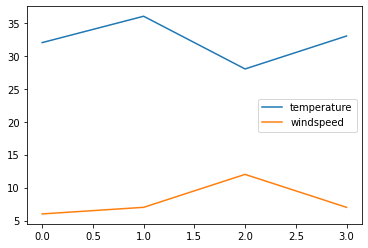

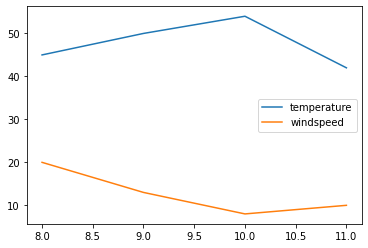

In [14]:
%matplotlib inline
g.plot()

In [30]:
def grouper(df, idx, col):
    print(idx)
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'


g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

0
1
2
3
4
5
6
7
8
9
10
11


In [31]:
for key, df in g:
    print("Group by Key: {}\n".format(key))
    print(df)
    print("====="*100)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy


In [32]:
import pandas as pd

In [33]:
# intialise data of lists.
data = {'Cat':['Tom', 'Tom', 'Sam', 'Sam','Bam','Tom','Bam','Tom','Bam','Sam','Sam','Tom'],
        'Mon':['jan', 'feb', 'mar', 'jan','feb','feb','mar','jan','feb','mar','jan','feb']}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
df

,Cat,Mon
0,Tom,jan
1,Tom,feb
2,Sam,mar
3,Sam,jan
4,Bam,feb
5,Tom,feb
6,Bam,mar
7,Tom,jan
8,Bam,feb
9,Sam,mar


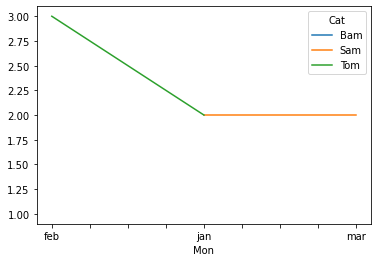

In [34]:
df.pivot_table(index=['Mon'],columns='Cat',aggfunc='size').plot(kind='line')

In [35]:
df_gb = df.groupby([ 'Mon', 'Cat']).size().unstack(level=1)
df_gb

Cat,Bam,Sam,Tom
Mon,,,
feb,2.0,NaN,3.0
jan,NaN,2.0,2.0
mar,1.0,2.0,NaN


In [36]:
df.groupby(['Mon','Cat']).size()

Mon  Cat
feb  Bam    2
     Tom    3
jan  Sam    2
     Tom    2
mar  Bam    1
     Sam    2
dtype: int64

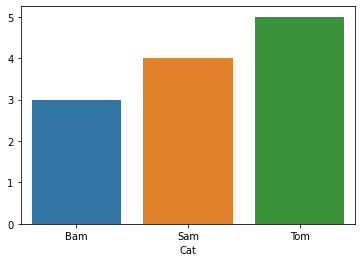

In [37]:
# import the module
import seaborn as sns
r = df.groupby(['Cat']).size()
# plot the result
sns.barplot(x = r.index, y = r.values)

In [38]:
a = df.groupby(['Cat']).count()
a

,Mon
Cat,
Bam,3
Sam,4
Tom,5


In [39]:
df = pd.DataFrame([[2015, 1, 1],
                    [2015, 1, 1],
                    [2015, 1, 2],
                    [2015, 1, 2],
                    [2015, 1, 2],
                    [2015, 2, 1],
                    [2015, 2, 1],
                    [2015, 2, 1],
                    [2015, 2, 2],
                    [2015, 2, 2]], columns = ['year', 'month', 'class'])
df

,year,month,class
0,2015,1,1
1,2015,1,1
2,2015,1,2
3,2015,1,2
4,2015,1,2
5,2015,2,1
6,2015,2,1
7,2015,2,1
8,2015,2,2
9,2015,2,2


In [40]:
df_gb = df.groupby([ 'month', 'class']).size().unstack(level=1)
df_gb

class,1,2
month,,
1,2,3
2,3,2


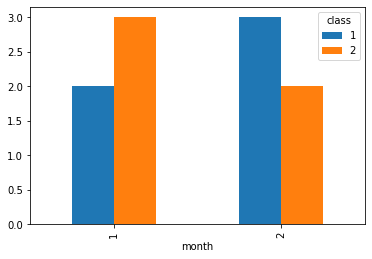

In [41]:
df_gb.plot(kind='bar')

In [42]:
# importing pandas as pd
import pandas as pd

# Creating the dataframe
p = "/content/drive/MyDrive/Colab/MachineCodeBasics/Basics/Data/nba.csv"
df1 = pd.read_csv(p)

# Print the dataframe
df1

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [45]:
# applying groupby() function to
# group the data on team value.
gk = df1[['Position','Team']].groupby('Team').count()

gk

,Position
Team,
Atlanta Hawks,15
Boston Celtics,15
Brooklyn Nets,15
Charlotte Hornets,15
Chicago Bulls,15
Cleveland Cavaliers,15
Dallas Mavericks,15
Denver Nuggets,15
Detroit Pistons,15
